In [24]:
import pandas as pd
import zipfile
with zipfile.ZipFile('IMDB Dataset.csv.zip') as f:
    f.extractall('c00ntent')
df = pd.read_csv('c00ntent\IMDB Dataset.csv')


<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\I'
C:\Users\acer\AppData\Local\Temp\ipykernel_11900\84323277.py:5: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv('c00ntent\IMDB Dataset.csv')


In [25]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [26]:
df.shape

(50000, 2)

In [27]:
df.dtypes

review       object
sentiment    object
dtype: object

In [28]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [29]:
# sentiment  column
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [30]:
# well balanced class

In [31]:
from bs4 import BeautifulSoup
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()


In [32]:
df['review'] = df['review'].apply(remove_html)

C:\Users\acer\AppData\Local\Temp\ipykernel_11900\656468003.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [33]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [34]:
import contractions
def expand_contractions(text):
    return contractions.fix(text)
df['review'] = df['review'].apply(expand_contractions)

In [35]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])
df['review'] = df['review'].apply(remove_stopwords)

In [36]:
df['review'] = df['review'].str.lower()

In [37]:
import spacy
from tqdm import tqdm
import pandas as pd

# Load spaCy with minimal components
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def lemmatize_batch(texts, batch_size=200):  # Reduced for safety
    return [" ".join([token.lemma_ for token in doc]) 
            for doc in nlp.pipe(texts, batch_size=batch_size)]

# Process in smaller chunks
def process_in_chunks(df, chunk_size=1000):  # Test with 1k first
    chunks = []
    for i in tqdm(range(0, len(df), chunk_size)):
        chunk = df.iloc[i:i+chunk_size].copy()
        chunk['review'] = lemmatize_batch(chunk['review'].tolist())
        chunks.append(chunk)
    return pd.concat(chunks)

df = process_in_chunks(df)

100%|██████████| 50/50 [18:28<00:00, 22.18s/it]


In [28]:
df['review']= df['review'].str.lower()

In [29]:
import string

def remove_punctuation(text):
    
    return text.translate(str.maketrans('', '', string.punctuation))


df['review'] = df['review'].apply(remove_punctuation)

In [31]:
df.head()

,review,sentiment
0,one of the other reviewer have mention that af...,positive
1,a wonderful little production the filming tec...,positive
2,i think this be a wonderful way to spend time ...,positive
3,basically there be a family where a little boy...,negative
4,petter mattei s love in the time of money be...,positive


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000) 
X = tfidf.fit_transform(df['review'])

In [34]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [19]:
from sklearn.model_selection import train_test_split
X = df['review']

X_train, X_test, y_train, y_test = train_test_split(
    X, df['sentiment'], test_size=0.2, random_state=42
)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'kept asking many fights, screaming matches, swearing general mayhem permeate 84 minutes. comparisons also stand think one-dimensional characters, little depth virtually impossible care happens them. badly written cyphers director hang multicultural beliefs on, topic done much better dramas tv cinema.i must confess, really one spotting bad performances film, must said nichola burley (as heroine\'s slutty best friend) wasim zakir (as nasty, bullying brother) absolutely terrible. know acting school graduated from, would apply full refund post haste. samina awan lead role manages impress cast so-called british talent probably never hear again. least, hope. next time, hire different scout.another intriguing thought hideously fashionable soundtrack featuring likes snow patrol, ian brown keane. now, bit music fan familiar artists output, recognise tracks movie (apart omnipresent "run"). b-sides, anyone? get many, many musical montages telegraph suppose feel. accompanied startlingly original images couples kissing swollen lake canoodling doorways. problem, none songs convey mood efficiently, realise director lacks ability carry emotional journey audience storytelling dialogue alone.the ending presumably meant desserts, everybody gets comeuppance least one big shock store.. remained resolutely unmoved script given no-one root for. enough tackle hot-button issue, actually give us plot already done death individuals window dressing. stands, film noble failure, promising lead actress mildly diverting punch-ups save bin. 4/10. must try harder..'

In [23]:
import numpy as np
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))
print("Shapes:", X_train.shape, y_train.shape)
print("NaN in X:", np.isnan(X_train).any())
print("NaN in y:", np.isnan(y_train).any())
print("Unique y values:", np.unique(y_train))

X_train type: <class 'pandas.core.series.Series'>
y_train type: <class 'pandas.core.series.Series'>
Shapes: (40000,) (40000,)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [37]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [51]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [ ]:
def predict_sentiment(text):
    """
    Predict sentiment for a single review text
    """
    # Preprocess the text (same pipeline as training)
    text = remove_html(text)
    text = expand_contractions(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)  # You'll need to define this wrapper
    text = text.lower()
    text = remove_punctuation(text)
    
    # Vectorize
    text_vector = tfidf.transform([text])
    
    # Predict
    prediction = model.predict(text_vector)
    probability = model.predict_proba(text_vector)
    
    return {
        'sentiment': 'positive' if prediction[0] == 1 else 'negative',
        'positive_prob': float(probability[0][1]),
        'negative_prob': float(probability[0][0])
    }

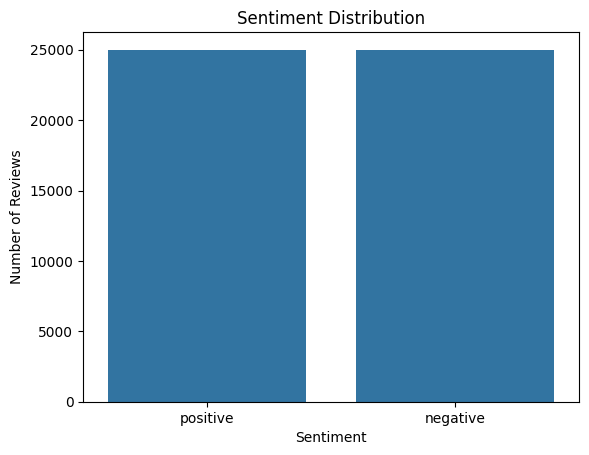

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


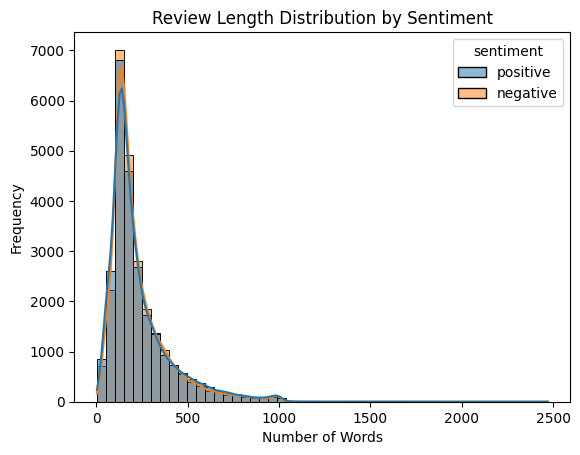

In [4]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


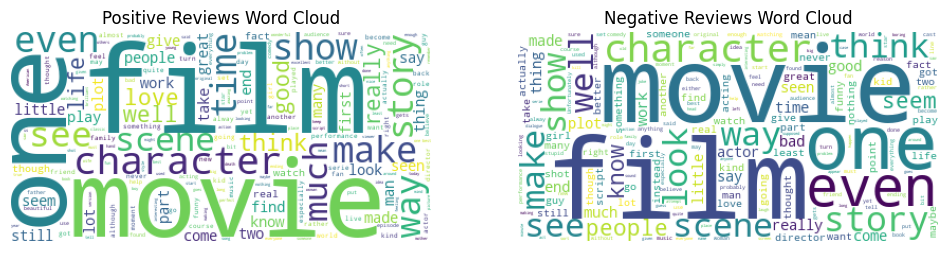

In [12]:
from wordcloud import WordCloud

pos_text = " ".join(df[df['sentiment']=='positive']['review'])
neg_text = " ".join(df[df['sentiment']=='negative']['review'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(pos_text))
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(neg_text))
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test, y_pred = ... (your test labels and predictions)
cm = confusion_matrix(y_test, predictions, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
from collections import Counter

def plot_top_words(sentiment, n=10):
    words = " ".join(df[df['sentiment']==sentiment]['review']).split()
    common_words = Counter(words).most_common(n)
    words, counts = zip(*common_words)
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Words in {sentiment.capitalize()} Reviews')
    plt.xlabel('Count')
    plt.show()

plot_top_words('positive')
plot_top_words('negative')
